In [1]:
import matplotlib as mlt
import matplotlib.pyplot as plt

import numpy as np
import cv2
from Utils import *

import ipywidgets as widgets
from ipywidgets import interact, interact_manual, fixed, IntSlider

%matplotlib inline
mlt.rcParams['figure.figsize'] = (16,8)

# Loading and visualizing an image / Color spaces

What happens when we load an image ? Two factors are to be taken into consideration : 
* The **color space** : we can load the image as grayscale, as RGB or BGR, as HSV...
* The **size** : the image will be loaded as it is but to visualize it we either will see it in its original size or smaller/bigger by using interpolation

## 1. Loading the image as color or grayscale

Let's roll with a cat photo from [here](https://consent.yahoo.com/collectConsent?sessionId=3_cc-session_f4281543-3d95-497d-9f03-283925dae4ca&lang=en-us&inline=false)

In [2]:
source_image = 'data\cat.jpeg'

Using open cv we can load the image as Grayscale or as BGR (additional dimension of depth). The resulting object is a numpy array of data type uint8 (unsigned 8 bit integer holding values between 0 and 255).

In [3]:
img_gray = cv2.imread(source_image, 0)
print("Grayscale image :\n data type = {}; matrix shape = {}".format(img_gray.dtype, img_gray.shape))

img_bgr = cv2.imread(source_image, 1)
print("BGR image :\n data type = {}; matrix shape = {}".format(img_bgr.dtype, img_bgr.shape))

# Flip dimension to have RGB for pyplot
img_rgb = np.flip(img_bgr, axis=2)

Grayscale image :
 data type = uint8; matrix shape = (463, 720)
BGR image :
 data type = uint8; matrix shape = (463, 720, 3)


Let's use pyplot to visualize the images in the notebook : they will be scaled to fit the notebook layout using interpolation, we'll talk about this more in detail in the next section.

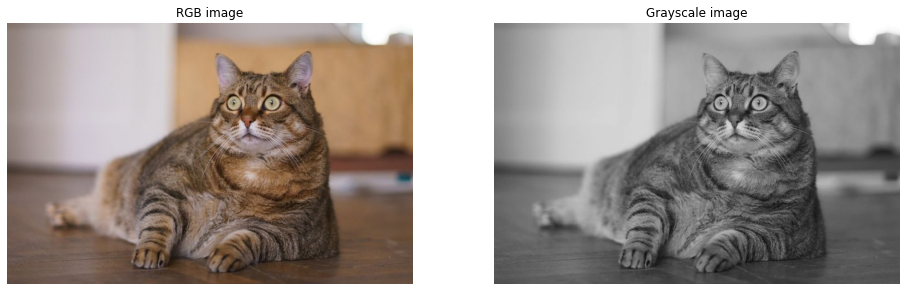

In [4]:
plt.subplot(1, 2, 1)
plt.title('RGB image')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Grayscale image')
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.show()

## 2. Grayscale image

A grayscale image is a single matrix where each value represents the amount of light carried by the pixel, i.e. its intensity. A color photo can be converted to grayscale, there are different possible formulas designed to render the intensity information with maximal fidelity (more info [here](https://en.wikipedia.org/wiki/Grayscale)).

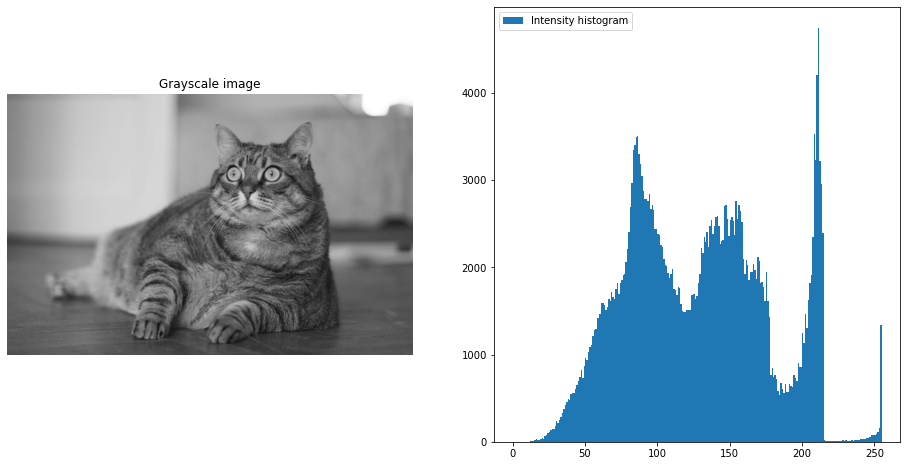

In [5]:
plt.subplot(1, 2, 1)
plt.title('Grayscale image')
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(img_gray.ravel(), range=(0,255), label='Intensity histogram', bins = np.arange(256))
plt.legend()
plt.show()

## 2. RGB image

RGB is a color space where various colors and rendered by a weighted sum of primary red, green and blue colors. It is one possibility among others, havings some biological motivations related to the human eye, and it does not allow the reproduction of *all* possible colors (more info [here](https://en.wikipedia.org/wiki/RGB_color_model)).

In [6]:
r_channel = img_rgb[:, :, 0]
b_channel = img_rgb[:, :, 1]
g_channel = img_rgb[:, :, 2]

We can visualize separate histograms for each channel as we did for the intensity of the grayscale image.

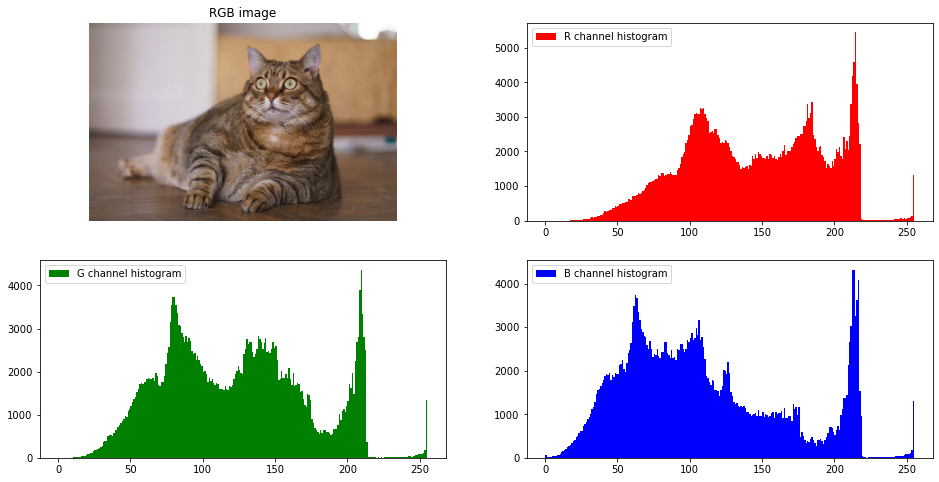

In [7]:
plt.subplot(2, 2, 1)
plt.title('RGB image')
plt.imshow(img_rgb, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.hist(r_channel.ravel(), range=(0,255), color = 'r', label='R channel histogram', bins = np.arange(256))
plt.legend()

plt.subplot(2, 2, 3)
plt.hist(b_channel.ravel(), range=(0,255), color = 'g', label='G channel histogram', bins = np.arange(256))
plt.legend()

plt.subplot(2, 2, 4)
plt.hist(g_channel.ravel(), range=(0,255), color = 'b', label='B channel histogram', bins = np.arange(256))
plt.legend()
plt.show()

Here is an interactive piece of code to shift values on either of the channels (setting two of them to 0 will show the representation of the single one that's left). Unfortunately this does not work on github, so you need to run this notebook on your computer...

In [9]:
_ = interact(shift_rgb_values, 
             input_color_rgb = fixed(img_rgb), 
             show = fixed(True),
             red = (-255,255), 
             green = (-255,255), 
             blue = (-255,255))

interactive(children=(IntSlider(value=0, description='red', max=255, min=-255), IntSlider(value=0, description…

## 3. HSV Color space

RGB can be a suitable color space to visualize the image, however it becomes problematic when we want to do things such as tweeking the brightness or the saturation of the image without changing it's original colors. A more suitable color space exists for this : HSV (hue = colors, saturation, value = intensity; more info [here](https://en.wikipedia.org/wiki/HSL_and_HSV)).

TODO explicit meaning of channels ?

In [10]:
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

To better understand the meaning of the channels we can visualize the effect of their individual modification on the original image.

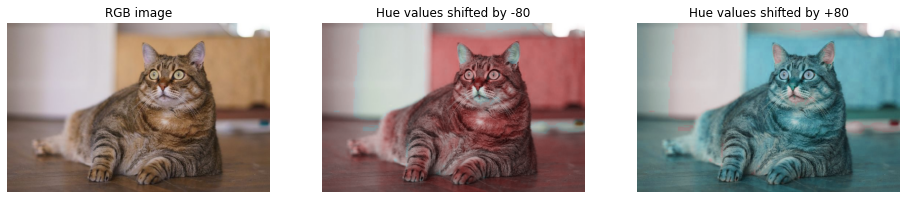

In [17]:
plt.subplot(1, 3, 1)
plt.title('RGB image')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Hue values shifted by -80')
plt.imshow(shift_hsv_values(img_hsv, False, -80, 0, 0))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Hue values shifted by +80')
plt.imshow(shift_hsv_values(img_hsv, False, 80, 0, 0))
plt.axis('off')
plt.show()

Shifting the hue changes the colors of the image (without changing the intensity of anything else).

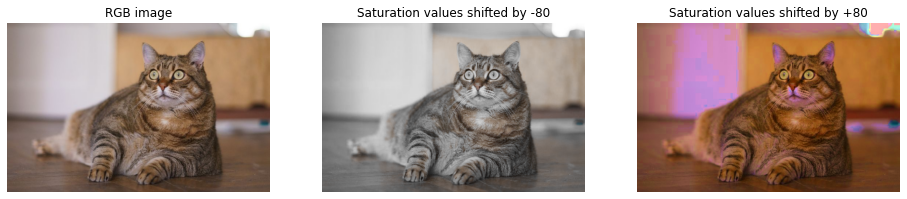

In [18]:
plt.subplot(1, 3, 1)
plt.title('RGB image')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Saturation values shifted by -80')
plt.imshow(shift_hsv_values(img_hsv, False, 0, -80, 0))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Saturation values shifted by +80')
plt.imshow(shift_hsv_values(img_hsv, False, 0, 80, 0))
plt.axis('off')
plt.show()

Shifting the saturation changes the intensity of each color present in the image.

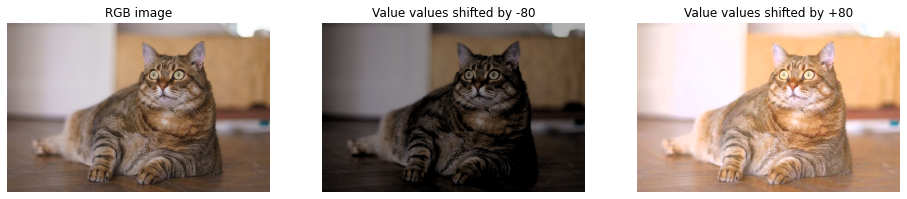

In [19]:
plt.subplot(1, 3, 1)
plt.title('RGB image')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Value values shifted by -80')
plt.imshow(shift_hsv_values(img_hsv, False, 0, 0, -80))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Value values shifted by +80')
plt.imshow(shift_hsv_values(img_hsv, False, 0, 0, 80))
plt.axis('off')
plt.show()

Shifting the value changes the global intensity/brightness of the image.

Here is an ineractive cell to play around with the shift values (hue values are between 0 and 179 due to the structure of the color space). Again you need to run the notebook to be able to use this.

In [21]:
_ = interact(shift_hsv_values, 
             input_color_hsv = fixed(img_hsv),
             show = fixed(True),
             hue = (-179,179), 
             saturation = (-255,255), 
             value = (-255,255))

interactive(children=(IntSlider(value=0, description='hue', max=179, min=-179), IntSlider(value=0, description…

Let's keep in mind that other color spaces exist and may be suitable for given problems : different versions of RGB, CMYK, XYZ, etc.